In [1]:
import numpy as np
import pandas as pd
# %matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
 
set_matplotlib_formats ('png')

def my_plot (x1, y1, xerr = 0, yerr = 0, title="", xlabel="", ylabel="", number=1, approx=False, fig_=False, ax1_=False):

    if (approx):
        k1, s1 = np.polyfit (x1, y1, deg=1, cov=True)

    plt.figure()

    fig, ax1 = plt.subplots(figsize=(16, 16), dpi=100)

    ax1.set_title (title)

    ax1.set_ylabel (ylabel) 
    ax1.set_xlabel (xlabel)

    ax1.scatter (x1, y1, marker=".", s = 100)

    ax1.errorbar (x1, y1, xerr=xerr, yerr=yerr, fmt='none')

    if (approx):
        ax1.plot (x1, np.poly1d (k1)(x1))

    else:
        ax1.plot (x1, y1)

    plt.grid()
    plt.savefig(f"./picturies/graph{number}.png", dpi=100)
    plt.show()

/tmp/ipykernel_5973/227415613.py:7: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats ('png')


In [2]:
import pandas as pd

In [4]:
pd_data = pd.read_csv ("data.csv")
data = pd_data.to_numpy()

III Получение вольт-амперной х-тики в статическом режиме измерений

4 В задерж

In [5]:
I1 = np.array (list (map (float, data[11][2:-1]))) # в мА
U1 = np.array (list (map (float, data[12][2:-1]))) # в В
I1, U1

(array([0.0018, 0.0625, 0.0933, 0.1043, 0.1103, 0.1077, 0.072 , 0.0652,
        0.0682, 0.0948, 0.1191, 0.1842, 0.176 , 0.1595, 0.1607, 0.238 ,
        0.2861]),
 array([4.000e-02, 1.000e+01, 1.504e+01, 1.700e+01, 1.885e+01, 2.002e+01,
        2.279e+01, 2.369e+01, 2.444e+01, 2.708e+01, 2.941e+01, 3.765e+01,
        4.003e+01, 4.365e+01, 4.557e+01, 6.064e+01, 8.011e+01]))

6 В

In [7]:
I2 = np.array (list (map (float, data[14][2:-1]))) # в мА
U2 = np.array (list (map (float, data[15][2:-1]))) # в В
I2, U2

(array([-0.008 ,  0.053 ,  0.0849,  0.1043,  0.1   ,  0.0578,  0.0368,
         0.0515,  0.1414,  0.152 ,  0.1386,  0.117 ,  0.1245,  0.1766,
         0.1798,  0.1793,  0.1791]),
 array([4.000e-02, 1.003e+01, 1.502e+01, 1.934e+01, 2.100e+01, 2.298e+01,
        2.515e+01, 2.701e+01, 3.513e+01, 3.863e+01, 4.102e+01, 4.693e+01,
        5.003e+01, 6.002e+01, 6.426e+01, 6.604e+01, 6.869e+01]))

8 В

In [24]:
I3 = np.array (list (map (float, data[17][2:-1]))) # в мА
U3 = np.array (list (map (float, data[18][2:-1]))) # в В
I3, U3

(array([-0.008 ,  0.04  ,  0.0719,  0.0965,  0.0897,  0.018 ,  0.0152,
         0.0495,  0.1184,  0.1209,  0.1077,  0.0791,  0.078 ,  0.0878,
         0.1253,  0.1222,  0.1184]),
 array([4.000e-02, 1.000e+01, 1.473e+01, 1.967e+01, 2.215e+01, 2.498e+01,
        2.593e+01, 2.998e+01, 3.668e+01, 3.921e+01, 4.135e+01, 4.762e+01,
        4.908e+01, 5.287e+01, 6.349e+01, 6.752e+01, 7.184e+01]))

IV Обработка результатов

1 Энергия возбуждения атомов

4 В: 3.2 эВ  
6 В: 3.2 эВ  
8 В: 3.4 эВ

Апроксимация

<Figure size 432x288 with 0 Axes>

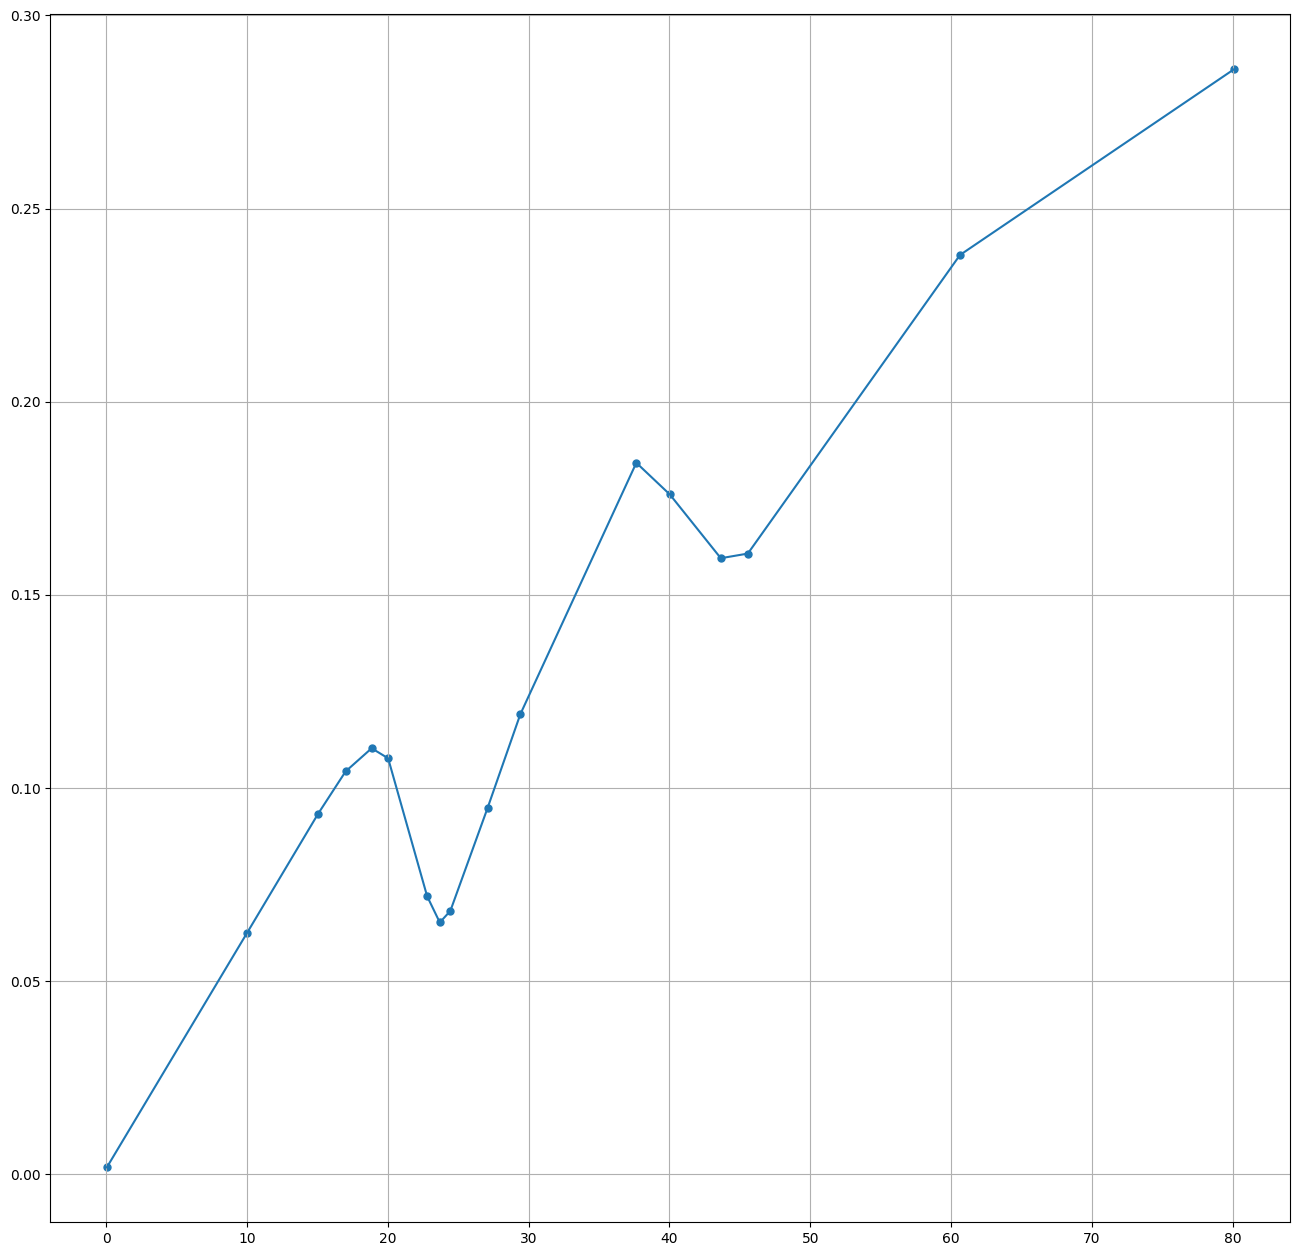

In [8]:
my_plot (U1, I1)

In [9]:
max1_coef = np.polyfit (U1[3:6], I1[3:6], deg=2)
x1_list = np.arange (U1[3], U1[5], (U1[5] - U1[3]) / 100)
y1_list = x1_list ** 2 * max1_coef[0] + x1_list * max1_coef[1] + max1_coef[2]

In [10]:
max2_coef = np.polyfit (U1[6:9], I1[6:9], deg=2)
x2_list = np.arange (U1[6], U1[8], (U1[8] - U1[6]) / 100)
y2_list = x2_list ** 2 * max2_coef[0] + x2_list * max2_coef[1] + max2_coef[2]

In [11]:
max3_coef = np.polyfit (U1[12:15], I1[12:15], deg=2)
x3_list = np.arange (U1[12], U1[14], (U1[14] - U1[12]) / 100)
y3_list = x3_list ** 2 * max3_coef[0] + x3_list * max3_coef[1] + max3_coef[2]

In [14]:
x_res1 = list(U1[0:3]) + list (x1_list) + list (x2_list) + list (U1[9:12]) + list (x3_list) + list (U1[15:])

y_res1 = list(I1[0:3]) + list (y1_list) + list (y2_list) + list (I1[9:12]) + list (y3_list) + list (I1[15:])


<Figure size 432x288 with 0 Axes>

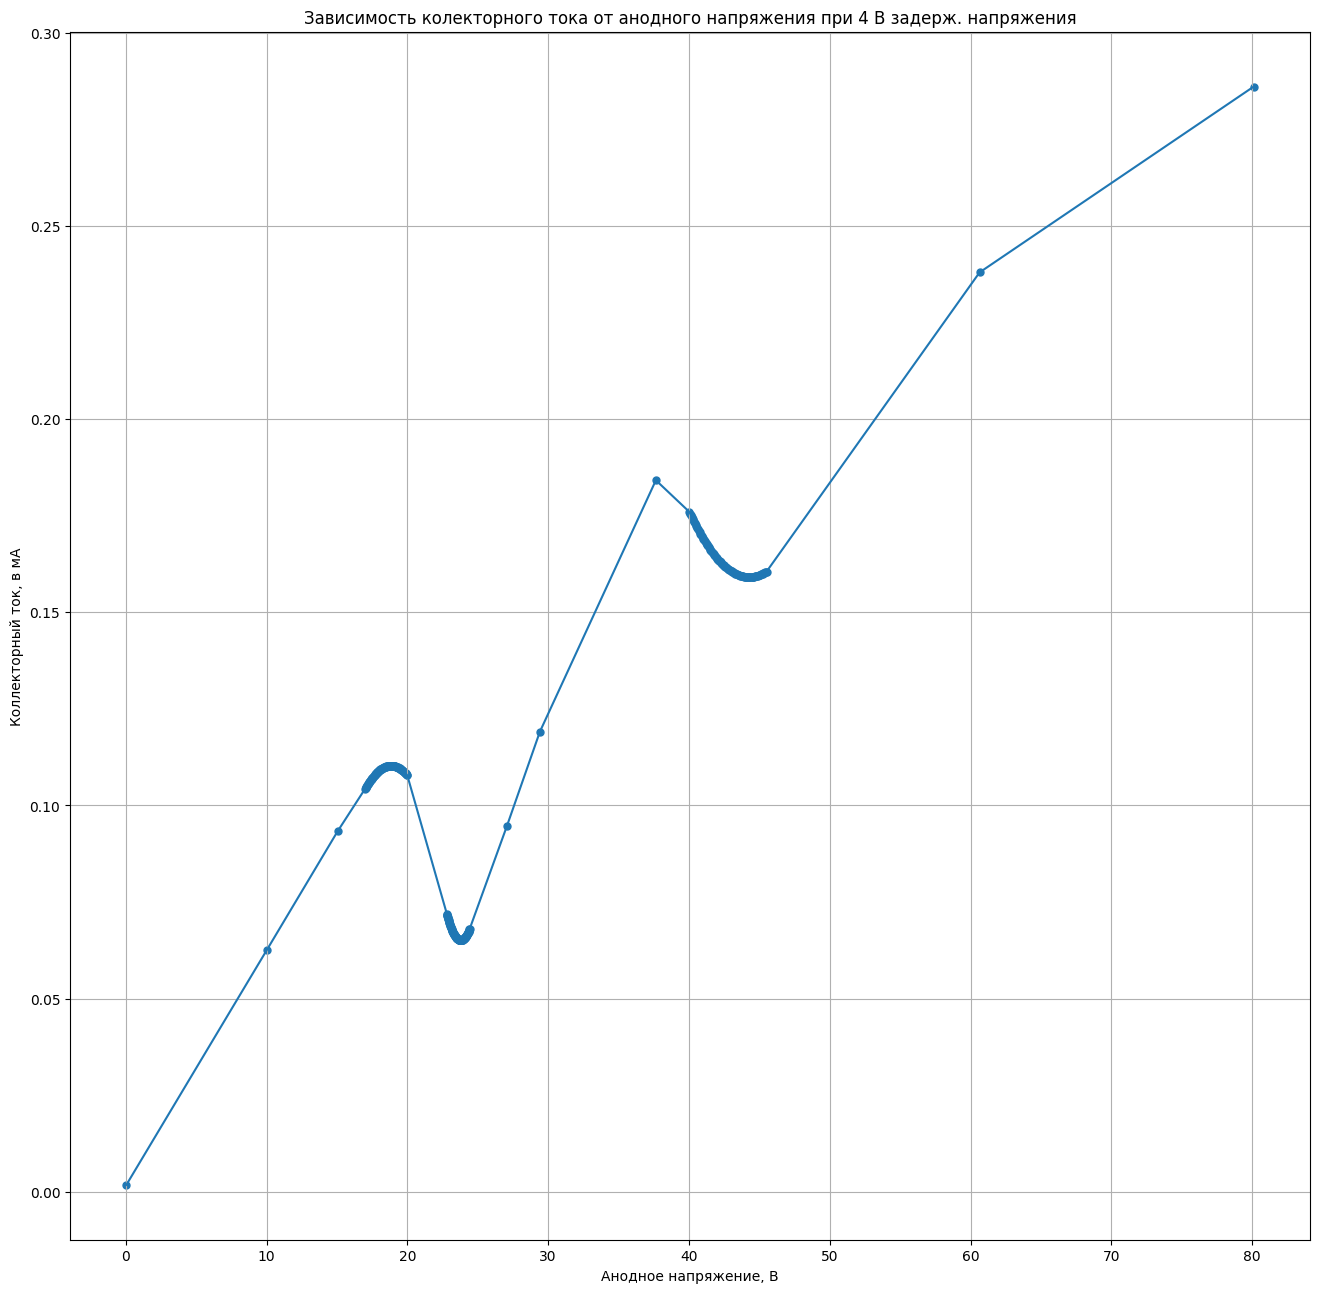

In [15]:
my_plot (x_res1, y_res1, number=1, title="Зависимость колекторного тока от анодного напряжения при 4 В задерж. напряжения", xlabel="Анодное напряжение, В", ylabel="Коллекторный ток, в мА")

<Figure size 432x288 with 0 Axes>

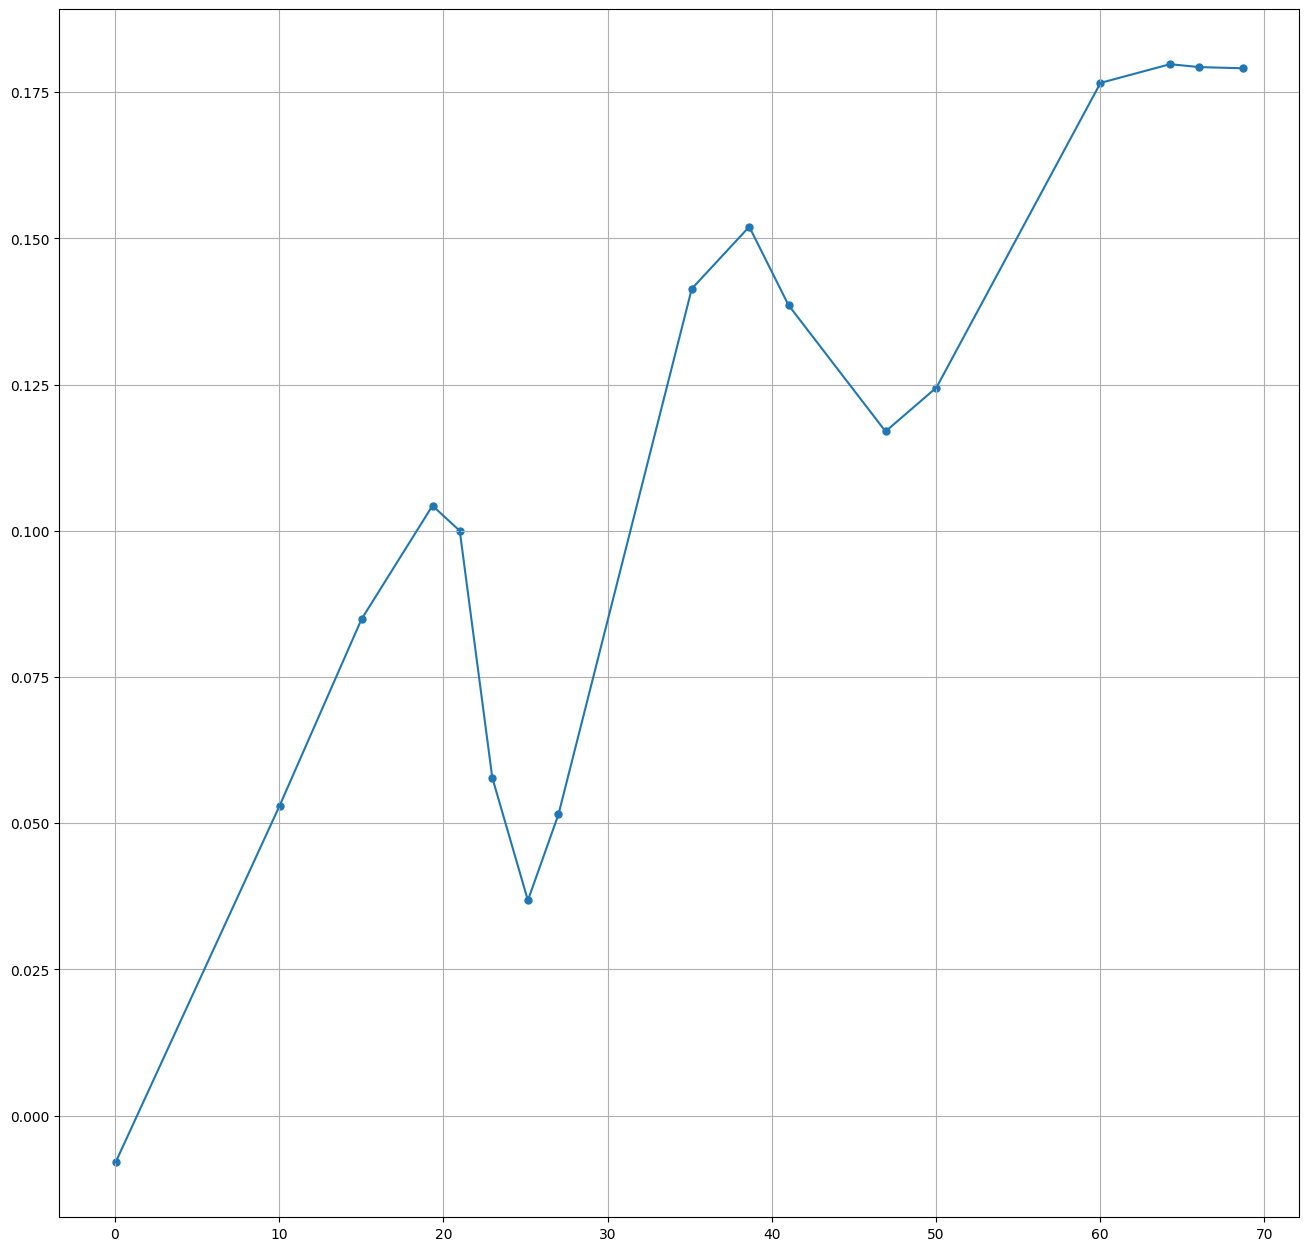

In [16]:
my_plot (U2, I2)

In [17]:
max4_coef = np.polyfit (U2[2:5], I2[2:5], deg=2)
x4_list = np.arange (U2[2], U2[4], (U2[4] - U2[2]) / 100)
y4_list = x4_list ** 2 * max4_coef[0] + x4_list * max4_coef[1] + max4_coef[2]

In [18]:
max5_coef = np.polyfit (U2[5:8], I2[5:8], deg=2)
x5_list = np.arange (U2[5], U2[7], (U2[7] - U2[5]) / 100)
y5_list = x5_list ** 2 * max5_coef[0] + x5_list * max5_coef[1] + max5_coef[2]

In [19]:
max6_coef = np.polyfit (U2[8:11], I2[8:11], deg=2)
x6_list = np.arange (U2[8], U2[10], (U2[10] - U2[8]) / 100)
y6_list = x6_list ** 2 * max6_coef[0] + x6_list * max6_coef[1] + max6_coef[2]

In [20]:
max16_coef = np.polyfit (U2[10:13], I2[10:13], deg=2)
x16_list = np.arange (U2[10], U2[12], (U2[12] - U2[10]) / 100)
y16_list = x16_list ** 2 * max16_coef[0] + x16_list * max16_coef[1] + max16_coef[2]

In [21]:
x_res2 = list (U2[0:2]) + list (x4_list) + list (x5_list) + list (x6_list) + list (x16_list) + list (U2[12:])

y_res2 = list (I2[0:2]) + list (y4_list) + list (y5_list) + list (y6_list) + list (y16_list) + list (I2[12:])


<Figure size 432x288 with 0 Axes>

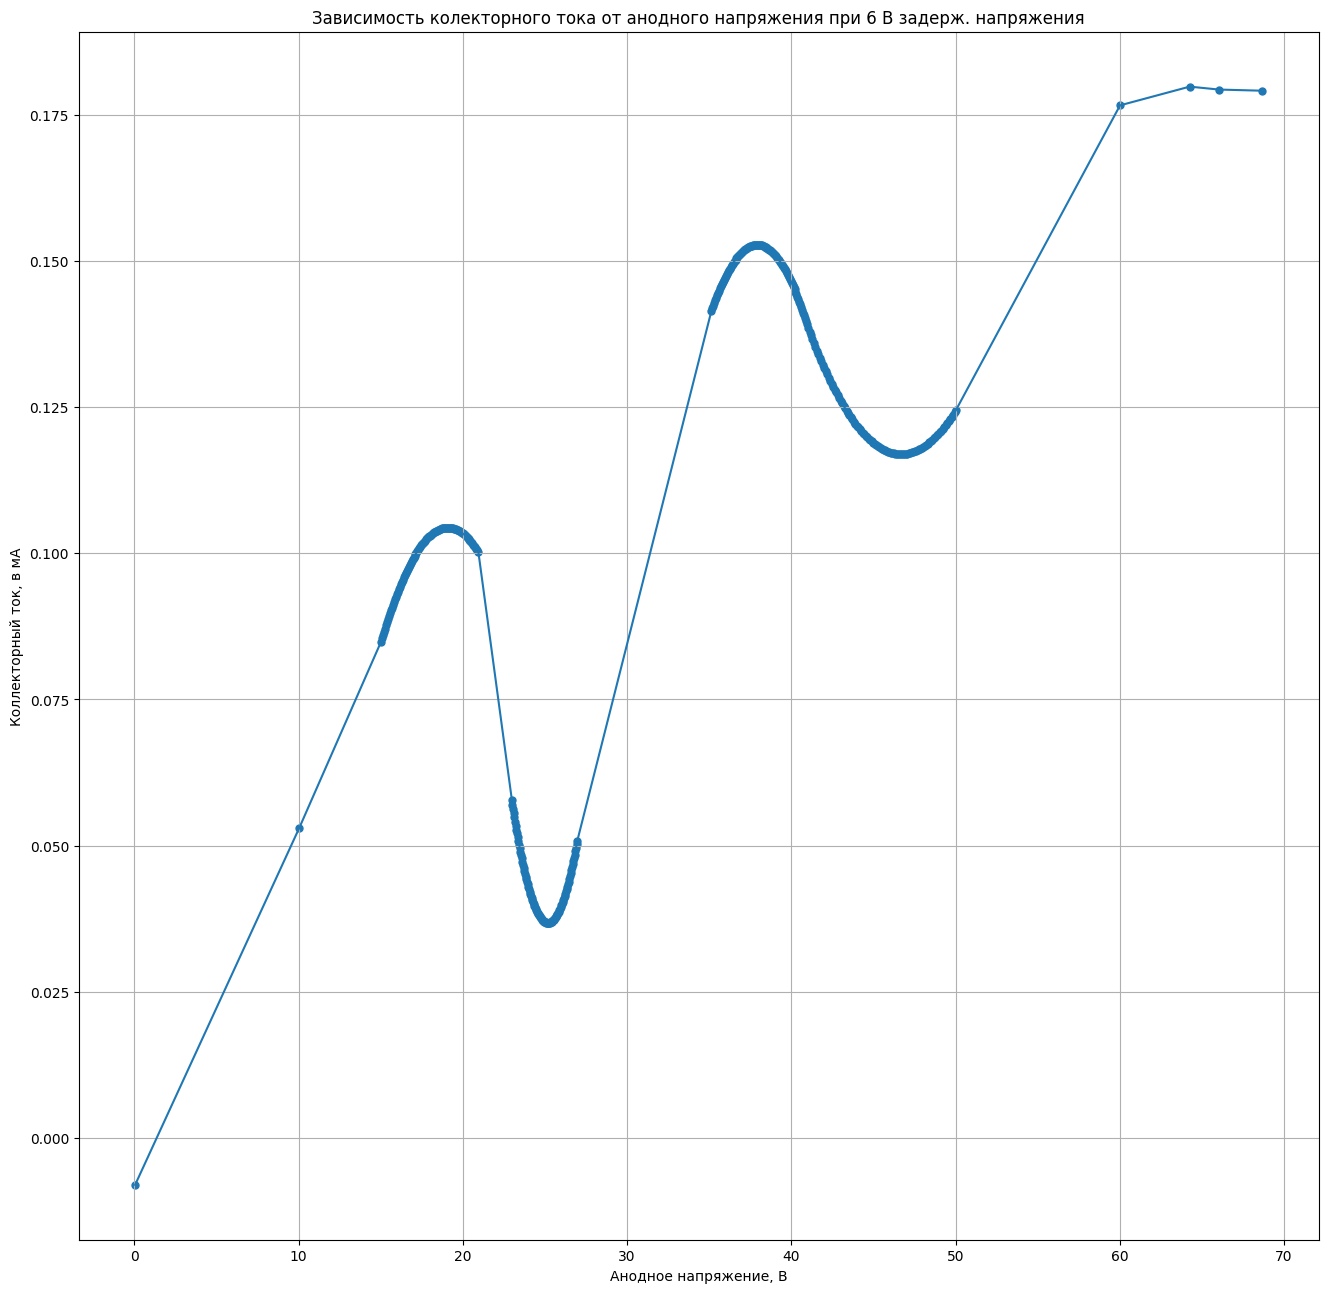

In [22]:
my_plot (x_res2, y_res2, number=2, title="Зависимость колекторного тока от анодного напряжения при 6 В задерж. напряжения", xlabel="Анодное напряжение, В", ylabel="Коллекторный ток, в мА")

<Figure size 432x288 with 0 Axes>

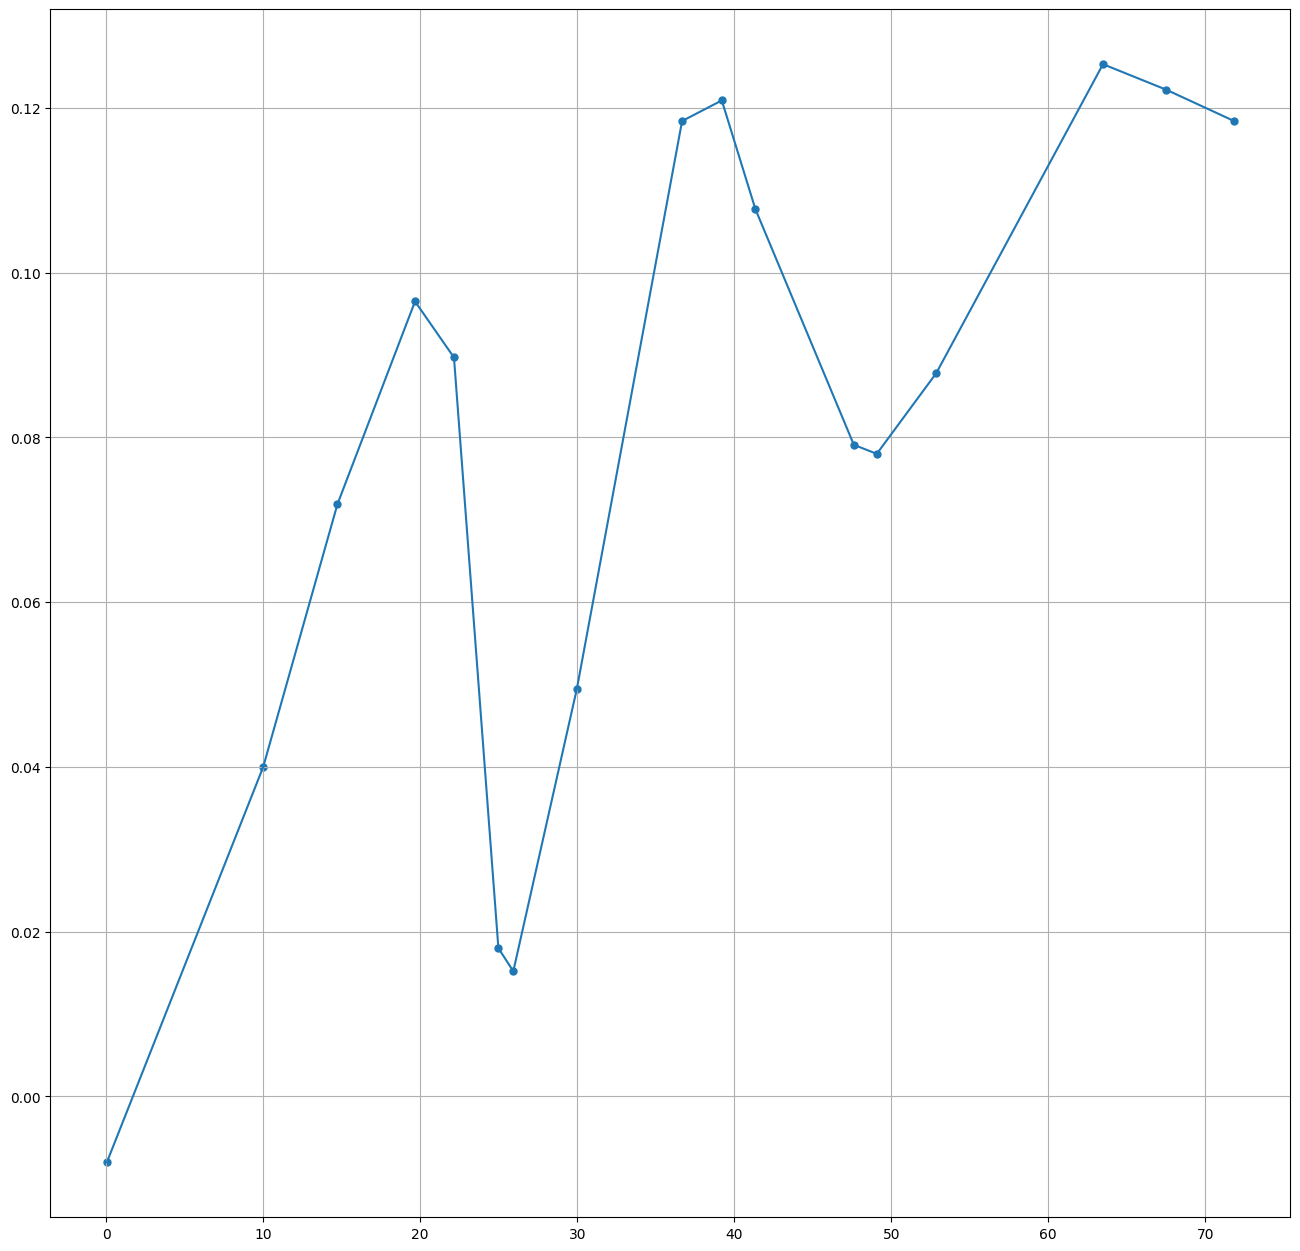

In [25]:
my_plot (U3, I3)

In [26]:
max7_coef = np.polyfit (U3[2:5], I3[2:5], deg=2)
x7_list = np.arange (U3[2], U3[4], (U3[4] - U3[2]) / 200)
y7_list = x7_list ** 2 * max7_coef[0] + x7_list * max7_coef[1] + max7_coef[2]

In [27]:
max8_coef = np.polyfit (U3[5:8], I3[5:8], deg=2)
x8_list = np.arange (U3[5], U3[7], (U3[7] - U3[5]) / 200)
y8_list = x8_list ** 2 * max8_coef[0] + x8_list * max8_coef[1] + max8_coef[2]

In [28]:
max9_coef = np.polyfit (U3[8:11], I3[8:11], deg=2)
x9_list = np.arange (U3[8], U3[10], (U3[10] - U3[8]) / 100)
y9_list = x9_list ** 2 * max9_coef[0] + x9_list * max9_coef[1] + max9_coef[2]

In [29]:
max10_coef = np.polyfit (U3[11:14], I3[11:14], deg=2)
x10_list = np.arange (U3[11], U3[13], (U3[13] - U3[11]) / 100)
y10_list = x10_list ** 2 * max10_coef[0] + x10_list * max10_coef[1] + max10_coef[2]

In [30]:
x_res3 = list (U3[0:2]) + list (x7_list) + list (x8_list) + list (x9_list) + list (x10_list) + list (U3[14:])
y_res3 = list (I3[0:2]) + list (y7_list) + list (y8_list) + list (y9_list) + list (y10_list) + list (I3[14:])

<Figure size 432x288 with 0 Axes>

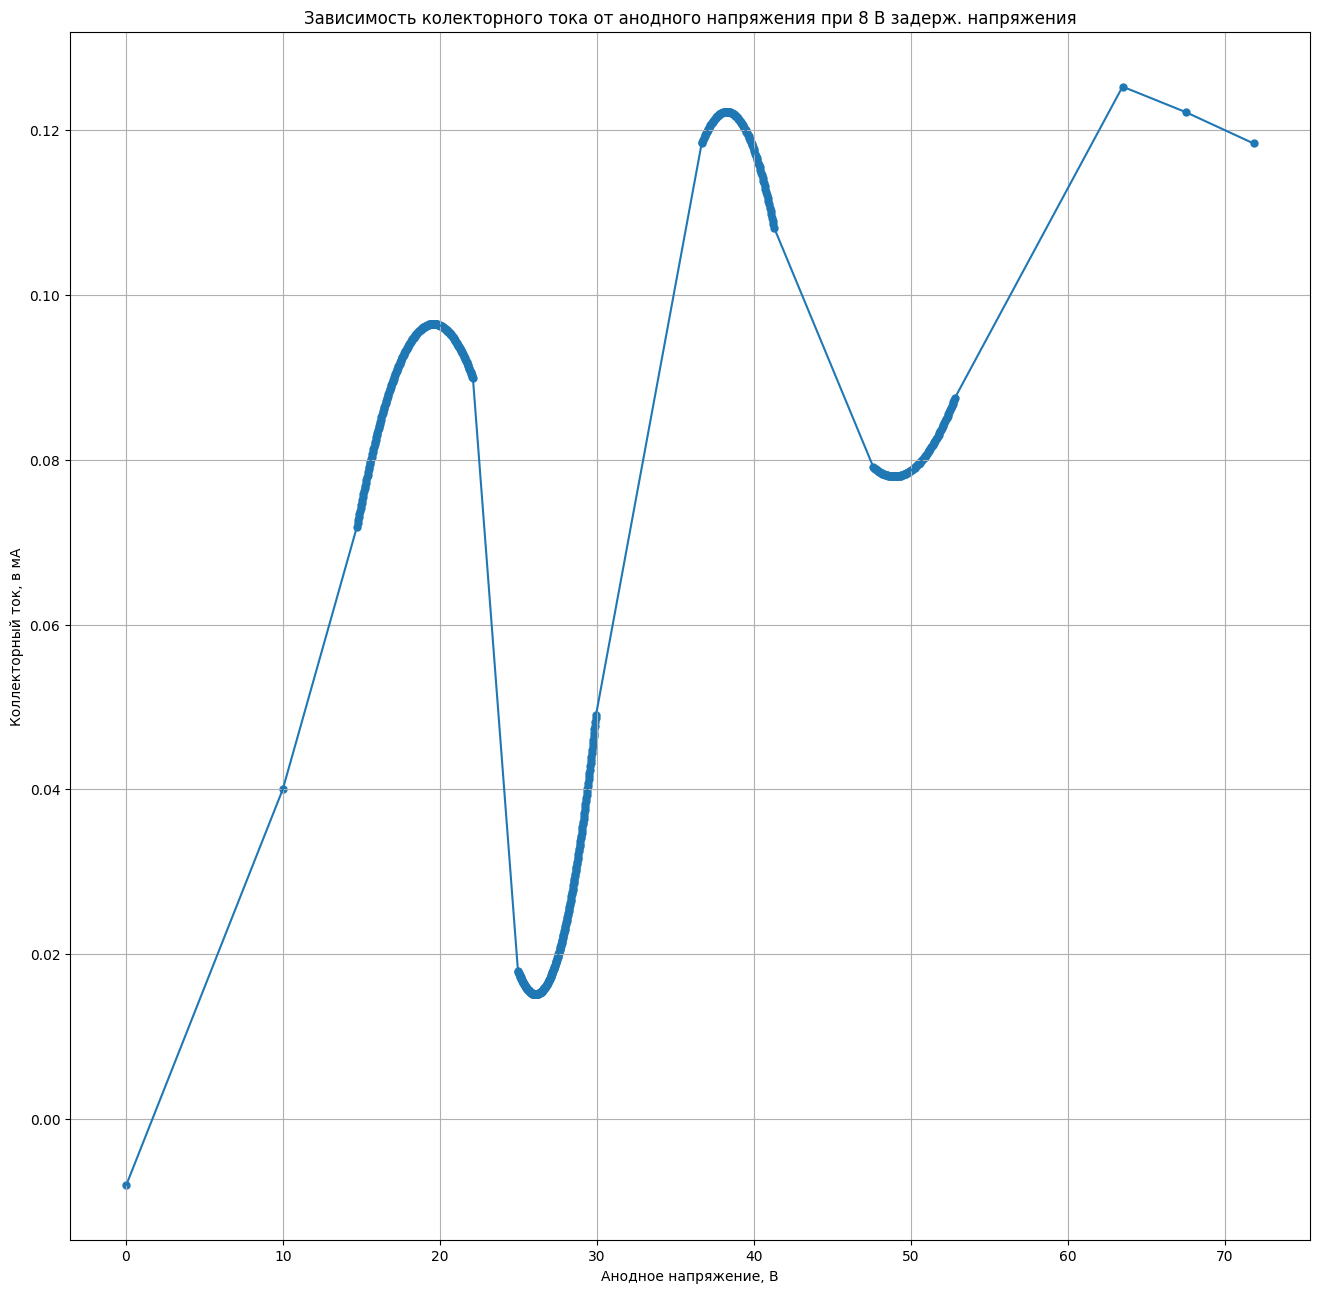

In [31]:
my_plot (x_res3, y_res3, number=3, title="Зависимость колекторного тока от анодного напряжения при 8 В задерж. напряжения", xlabel="Анодное напряжение, В", ylabel="Коллекторный ток, в мА")

<Figure size 432x288 with 0 Axes>

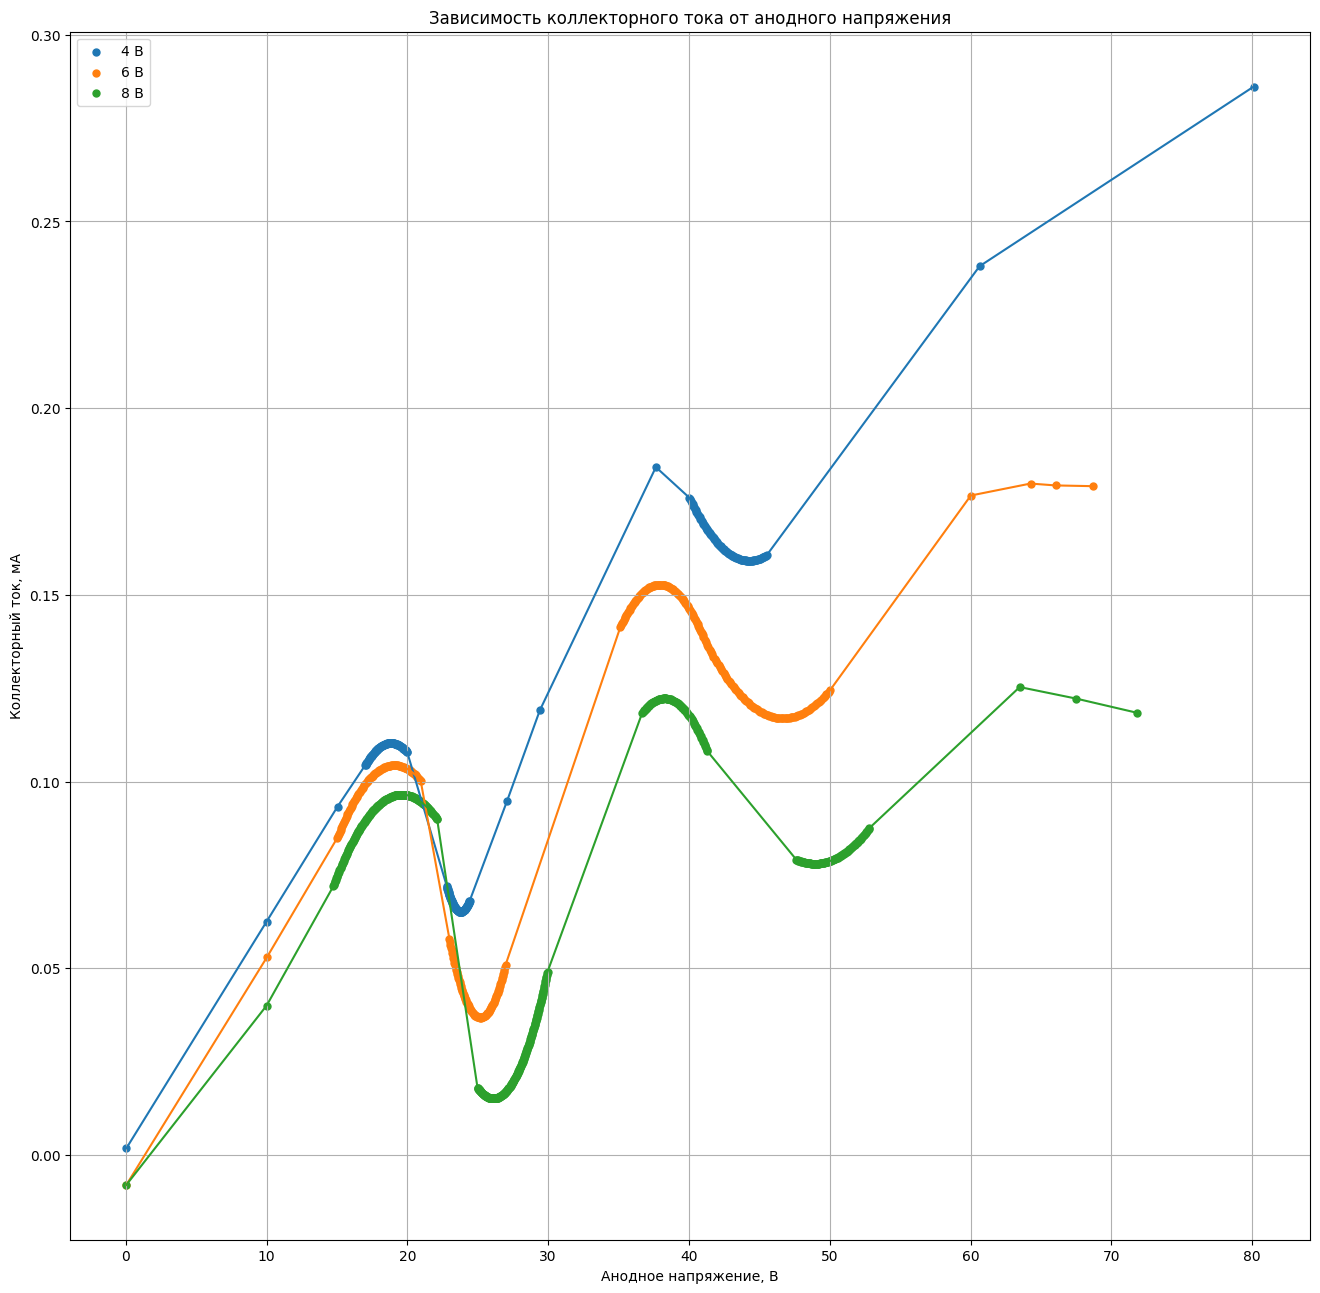

In [32]:
from cProfile import label


plt.figure()

fig, ax1 = plt.subplots(figsize=(16, 16), dpi=100)

ax1.set_title ("Зависимость коллекторного тока от анодного напряжения")

ax1.set_ylabel ("Коллекторный ток, мА") 
ax1.set_xlabel ("Анодное напряжение, В")

ax1.scatter (x_res1, y_res1, marker=".", s = 100, label="4 В")

ax1.plot (x_res1, y_res1)

ax1.scatter (x_res2, y_res2, marker=".", s = 100, label="6 В")

ax1.plot (x_res2, y_res2)

ax1.scatter (x_res3, y_res3, marker=".", s = 100, label="8 В")

ax1.plot (x_res3, y_res3)

plt.legend()
plt.grid()
plt.savefig(f"./picturies/graph4.png", dpi=100)
plt.show()